## **Bài tập lớn: Phân tích biến động giá cổ phiếu Intel (INTC)**
### **Môn học: Lập trình xử lí dữ liệu với python**
**Thành viên:**
- Nguyễn Văn Vũ - 24022493


#### **I. Thu thập và xử lí dữ liệu**
Tất cả các thư viện cần dùng:

In [62]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Thu thập dữ liệu:

                       Date       Open       High        Low      Close  \
0 2022-01-03 00:00:00-05:00  47.903634  49.369029  47.857258  49.350479   
1 2022-01-04 00:00:00-05:00  49.684368  50.027529  48.831100  49.285557   
2 2022-01-05 00:00:00-05:00  50.259401  52.095784  49.925516  49.962612   
3 2022-01-06 00:00:00-05:00  50.648939  50.704584  49.545252  50.092457   
4 2022-01-07 00:00:00-05:00  50.259401  50.444895  49.294838  49.563801   

     Volume  Dividends  Stock Splits  
0  33857600        0.0           0.0  
1  45681400        0.0           0.0  
2  59109300        0.0           0.0  
3  35757900        0.0           0.0  
4  30717200        0.0           0.0  


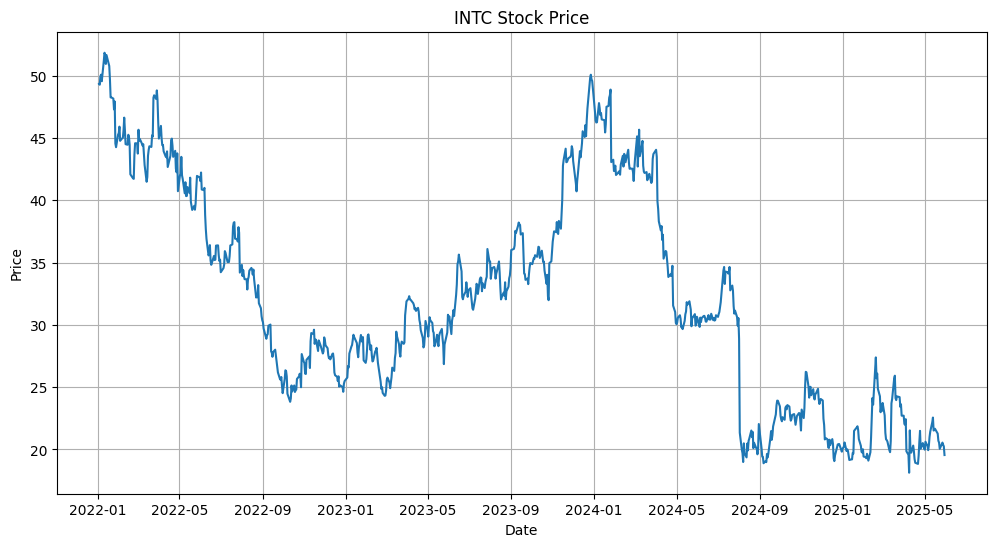

In [63]:
symbol = "INTC"
df = yf.Ticker(symbol).history(start='2022-01-01', end='2025-06-01').reset_index()
df.to_csv("data.csv", index=False)

print(df.head())
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=df, x='Date', y='Close')
plt.title(f'{symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()



Làm sạch và tiền xử lý dữ liệu:

In [64]:
df = pd.read_csv("data.csv")

# Chuyển cột ngày tháng về định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])
# Xóa dòng có giá trị bị thiếu (NaN)
df = df.dropna()
#  Kiểm tra và loại bỏ bất thường (outliers)
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]  
df.to_csv("data_clean.csv", index=False)

df.head()


C:\Users\bossg\AppData\Local\Temp\ipykernel_9860\3647300051.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-03 00:00:00-05:00,47.903634,49.369029,47.857258,49.350479,33857600,0.0,0.0
1,2022-01-04 00:00:00-05:00,49.684368,50.027529,48.831100,49.285557,45681400,0.0,0.0
2,2022-01-05 00:00:00-05:00,50.259401,52.095784,49.925516,49.962612,59109300,0.0,0.0
3,2022-01-06 00:00:00-05:00,50.648939,50.704584,49.545252,50.092457,35757900,0.0,0.0
4,2022-01-07 00:00:00-05:00,50.259401,50.444895,49.294838,49.563801,30717200,0.0,0.0


Tính toán chỉ số kỹ thuật cơ bản:

In [65]:
df = pd.read_csv("data_clean.csv")


# SMA: Trung bình động đơn giản
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# EMA: Trung bình động hàm mũ
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

# RSI: Relative Strength Index
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI_14'] = compute_rsi(df['Close'])

df.to_csv("data_technical.csv", index=False)

df[['Date', 'Close', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI_14']].head(50)


,Date,Close,SMA_20,SMA_50,EMA_20,RSI_14
0,2022-01-03 00:00:00-05:00,49.350479,NaN,NaN,49.350479,NaN
1,2022-01-04 00:00:00-05:00,49.285557,NaN,NaN,49.344296,NaN
2,2022-01-05 00:00:00-05:00,49.962612,NaN,NaN,49.403183,NaN
3,2022-01-06 00:00:00-05:00,50.092457,NaN,NaN,49.468828,NaN
4,2022-01-07 00:00:00-05:00,49.563801,NaN,NaN,49.477873,NaN
5,2022-01-10 00:00:00-05:00,51.205421,NaN,NaN,49.642402,NaN
6,2022-01-11 00:00:00-05:00,51.854641,NaN,NaN,49.853091,NaN
7,2022-01-12 00:00:00-05:00,51.696976,NaN,NaN,50.028699,NaN
8,2022-01-13 00:00:00-05:00,50.955006,NaN,NaN,50.116919,NaN
9,2022-01-14 00:00:00-05:00,51.659878,NaN,NaN,50.263867,NaN
